In [6]:
import pandas as pd
import os
from sqlalchemy import create_engine
import logging
import time

os.makedirs("logs", exist_ok=True)

logging.basicConfig(
    filename="logs/ingestion_db.log",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="a"
)

engine = create_engine('sqlite:///inventory.db')

def ingest_db_in_chunks(file_path, table_name, engine, chunksize=100000):
    '''this function will ingest the dataframe into database table'''
    first_chunk = True
    try:
        for chunk in pd.read_csv(file_path, chunksize=chunksize):
            chunk.to_sql(table_name, con=engine, if_exists='replace' if first_chunk else 'append', index=False)
            print(f"Ingested chunk of shape: {chunk.shape}")
            first_chunk = False
        logging.info(f"Completed ingestion for {file_path}")
    except Exception as e:
        logging.error(f"Error processing {file_path}: {str(e)}")

folder_path = '/content/drive/MyDrive/Vendor_Data'

def load_raw_data():
    '''this function will load the CSVs as dataframe and ingest into db'''
    start = time.time()
    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            file_path = os.path.join(folder_path, file)
            table_name = file[:-4]
            logging.info(f"Ingesting {file_path} into db")
            ingest_db_in_chunks(file_path, table_name, engine)
        else:
            logging.warning(f"Skipped non-CSV file: {file}")
    end = time.time()
    total_time = (end - start) / 60
    logging.info('-----------------Ingestion Completed-----------------')
    logging.info(f'Total time taken: {total_time:.2f} minutes')

if __name__ == "__main__":
    load_raw_data()


Ingested chunk of shape: (12261, 9)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (100000, 16)
Ingested chunk of shape: (72474, 16)
Ingested chunk of shape: (100000, 9)
Ingested chunk o

In [3]:
##def ingest_db(df, table_name, engine):
#    df.to_sql(table_name, con = engine, if_exists = 'replace', index = False)

In [4]:
folder_path = '/content/drive/MyDrive/Vendor_Data'

In [ ]:
# for file in os.listdir('/content/drive/MyDrive/Vendor_Data'):
#  if '.csv' in file:
#    df = pd.read_csv('/content/drive/MyDrive/Vendor_Data/'+file)
#    print(df.shape)
#    ingest_db(df,file[:-4], engine)

(12261, 9)
(2372474, 16)
(206529, 9)
(5543, 10)
(224489, 9)
(12825363, 14)


output of the above code

(12261, 9)

(2372474, 16)

(206529, 9)

(5543, 10)

(224489, 9)

(12825363, 14)

this leads to crash so to avoid this file is read in chunks

**Exploratory Data Analysis**

understanding the dataset to explore how the data is present in the database and if there is a need of creating some aggregated tables that can help with:

vendor selection for profitability

product Pricing optimization

In [8]:
import pandas as pd
import sqlite3

In [9]:
# creating database connection
connect = sqlite3.connect('inventory.db')

In [10]:
# checking tables present in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", connect)
tables

,name
0,purchase_prices
1,purchases
2,begin_inventory
3,vendor_invoice
4,end_inventory
5,sales


In [17]:
for table in tables['name']:
  print('-'*50, f'{table}','-'*50)
  print('Count of records:', pd.read_sql(f"select count(*) as count from {table}", connect)['count'].values[0])
  display(pd.read_sql(f"select * from {table} limit 5", connect))

-------------------------------------------------- purchase_prices --------------------------------------------------
Count of records: 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


-------------------------------------------------- purchases --------------------------------------------------
Count of records: 2372474


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


-------------------------------------------------- begin_inventory --------------------------------------------------
Count of records: 206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


-------------------------------------------------- vendor_invoice --------------------------------------------------
Count of records: 5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


-------------------------------------------------- end_inventory --------------------------------------------------
Count of records: 224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


-------------------------------------------------- sales --------------------------------------------------
Count of records: 12825363


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [18]:
purchases = pd.read_sql_query("select * from purchases where VendorNumber = 388", connect)
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1
1,42_BLACK HOLLOW_2034,42,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8249,2023-12-30,2024-01-06,2024-01-11,2024-02-18,21.32,30,639.60,1
2,79_BALLYMENA_2034,79,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8249,2023-12-30,2024-01-09,2024-01-11,2024-02-18,21.32,35,746.20,1
3,32_MOUNTMEND_2034,32,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8249,2023-12-30,2024-01-05,2024-01-11,2024-02-18,21.32,6,127.92,1
4,50_MOUNTMEND_2034,50,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8249,2023-12-30,2024-01-06,2024-01-11,2024-02-18,21.32,6,127.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,70_KELD_2034,70,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,13624,2024-12-22,2024-12-27,2025-01-06,2025-02-07,21.32,6,127.92,1
262,1_HARDERSFIELD_2034,1,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,13624,2024-12-22,2024-12-31,2025-01-06,2025-02-07,21.32,6,127.92,1
263,32_MOUNTMEND_2034,32,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,13624,2024-12-22,2024-12-27,2025-01-06,2025-02-07,21.32,6,127.92,1
264,59_CLAETHORPES_2034,59,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,13624,2024-12-22,2024-12-28,2025-01-06,2025-02-07,21.32,6,127.92,1


In [19]:
purchase_prices = pd.read_sql_query("select * from purchase_prices where VendorNumber = 388", connect)
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,2034,Glendalough Double Barrel,32.99,750mL,750,1,21.32,388,ATLANTIC IMPORTING COMPANY
1,2119,Glendalough 13 Yr Sngle Malt,89.99,750mL,750,1,66.40,388,ATLANTIC IMPORTING COMPANY
2,7241,Glendalough Poitin Shry Cask,34.99,750mL,750,2,20.68,388,ATLANTIC IMPORTING COMPANY


In [20]:
vendor_invoice = pd.read_sql_query("select * from vendor_invoice where VendorNumber = 388", connect)
vendor_invoice

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
1,388,ATLANTIC IMPORTING COMPANY,2024-01-11,8249,2023-12-30,2024-02-18,95,2025.40,10.73,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-25,8323,2024-01-04,2024-02-23,64,1364.48,7.10,None
3,388,ATLANTIC IMPORTING COMPANY,2024-01-31,8456,2024-01-13,2024-02-28,18,379.92,1.98,None
4,388,ATLANTIC IMPORTING COMPANY,2024-02-03,8497,2024-01-17,2024-03-08,83,2028.52,9.53,None
5,388,ATLANTIC IMPORTING COMPANY,2024-02-08,8675,2024-01-28,2024-03-13,82,1748.24,9.27,None
6,388,ATLANTIC IMPORTING COMPANY,2024-02-19,8704,2024-01-31,2024-03-20,24,511.68,2.40,None
7,388,ATLANTIC IMPORTING COMPANY,2024-02-25,8893,2024-02-12,2024-03-29,12,255.84,1.18,None
8,388,ATLANTIC IMPORTING COMPANY,2024-02-29,8962,2024-02-17,2024-04-08,29,618.28,3.34,None
9,388,ATLANTIC IMPORTING COMPANY,2024-03-08,9095,2024-02-26,2024-04-20,54,1151.28,6.22,None


In [25]:
sales = pd.read_sql_query("select * from sales where VendorNo = 388", connect)
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_2034,1,2034,Glendalough Double Barrel,750mL,1,28.99,28.99,2024-01-12,750.0,1,0.79,388,ATLANTIC IMPORTING COMPANY
1,1_HARDERSFIELD_2034,1,2034,Glendalough Double Barrel,750mL,1,28.99,28.99,2024-01-13,750.0,1,0.79,388,ATLANTIC IMPORTING COMPANY
2,1_HARDERSFIELD_2034,1,2034,Glendalough Double Barrel,750mL,1,28.99,28.99,2024-01-20,750.0,1,0.79,388,ATLANTIC IMPORTING COMPANY
3,1_HARDERSFIELD_2034,1,2034,Glendalough Double Barrel,750mL,1,28.99,28.99,2024-01-22,750.0,1,0.79,388,ATLANTIC IMPORTING COMPANY
4,10_HORNSEY_2034,10,2034,Glendalough Double Barrel,750mL,1,28.99,28.99,2024-01-20,750.0,1,0.79,388,ATLANTIC IMPORTING COMPANY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,7_STANMORE_2034,7,2034,Glendalough Double Barrel,750mL,1,27.99,27.99,2024-12-21,750.0,1,0.79,388,ATLANTIC IMPORTING COMPANY
1476,81_PEMBROKE_2034,81,2034,Glendalough Double Barrel,750mL,2,55.98,27.99,2024-12-19,750.0,1,1.57,388,ATLANTIC IMPORTING COMPANY
1477,81_PEMBROKE_2034,81,2034,Glendalough Double Barrel,750mL,1,27.99,27.99,2024-12-30,750.0,1,0.79,388,ATLANTIC IMPORTING COMPANY
1478,9_BLACKPOOL_2034,9,2034,Glendalough Double Barrel,750mL,1,27.99,27.99,2024-12-01,750.0,1,0.79,388,ATLANTIC IMPORTING COMPANY


In [26]:
purchases.groupby(['Brand', 'PurchasePrice'])[['Quantity', 'Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
2034,21.32,1777,37885.64
2119,66.40,39,2589.60
7241,20.68,31,641.08


In [27]:
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,2034,Glendalough Double Barrel,32.99,750mL,750,1,21.32,388,ATLANTIC IMPORTING COMPANY
1,2119,Glendalough 13 Yr Sngle Malt,89.99,750mL,750,1,66.40,388,ATLANTIC IMPORTING COMPANY
2,7241,Glendalough Poitin Shry Cask,34.99,750mL,750,2,20.68,388,ATLANTIC IMPORTING COMPANY


In [29]:
vendor_invoice['PONumber'].nunique()

53

In [30]:
vendor_invoice.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

In [31]:
sales.groupby('Brand')[['SalesDollars', 'SalesPrice', 'SalesQuantity']].sum()

,SalesDollars,SalesPrice,SalesQuantity
Brand,,,
2034,45645.13,37387.00,1587
2119,9838.85,6924.19,115
7241,3788.77,2989.01,123


1. The purchases table contains actual
purchase data, including the date of purchase, products (brands) purchased by vendors, the amount paid (in dollars), and the quantity purchased.

2. The purchase price column is derived from the purchase_price table, which provides product-wise actual and purchase prices. The combination of vendor and the brand is unique in the table

3. The vendor_invoice table aggregates data from the purchase table, summarizing quantity and dollar amounts, along with an additional column for freight. This table maintains uniqueness based on vendors and PO number.

4. The sales table captures actual sales transactions, detailing the brands purchased by vendors, the quantity sold, the selling price, and the revenue earned.






----------------------------------------------------------------------------------



As the data that we need for analysis isdistributed in different tables, we need to create a summary table containing:

1. purchase transaction made by vendors

2. sales transaction data

3. freight costs for each vendor

4. actual product prices from vendors

In [32]:
vendor_invoice.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

In [33]:
freight_summary = pd.read_sql_query("""select VendorNumber, Sum(Freight) as FreightCost
from vendor_invoice
group by VendorNumber""", connect)

In [34]:
freight_summary

,VendorNumber,FreightCost
0,2,27.08
1,54,0.48
2,60,367.52
3,105,62.39
4,200,6.19
...,...,...
121,98450,856.02
122,99166,130.09
123,172662,178.34
124,173357,202.50


In [35]:
purchases.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')

In [36]:
purchase_prices.columns

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorNumber', 'VendorName'],
      dtype='object')

In [39]:
pd.read_sql_query("""select
  p.VendorNumber,
  p.VendorName,
  p.Brand,
  p.PurchasePrice,
  pp.Volume,
  pp.Price as ActualPrice,
  sum(p.Quantity) as TotalPurchaseQuantity,
  sum(p.Dollars) as TotalPurchaseDollars
  from purchases p
  join purchase_prices pp
on p.Brand = pp.Brand
where p.PurchasePrice > 0
group by p.VendorNumber, p.VendorName, p.Brand
order by TotalPurchaseDollars desc
 """, connect)

,VendorNumber,VendorName,Brand,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars
0,1128,BROWN-FORMAN CORP,1233,26.27,1750,36.99,145080,3811251.60
1,4425,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,164038,3804041.22
2,17035,PERNOD RICARD USA,8068,18.24,1750,24.99,187407,3418303.68
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,201682,3261197.94
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750,29.99,138109,3023206.01
...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,1.32,750,4.99,2,2.64
10688,8004,SAZERAC CO INC,5683,0.39,50,0.49,6,2.34
10689,3924,HEAVEN HILL DISTILLERIES,9123,0.74,50,0.99,2,1.48
10690,3960,DIAGEO NORTH AMERICA INC,6127,1.47,200,1.99,1,1.47


In [40]:
sales.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [45]:
pd.read_sql_query("""select
VendorNo,
Brand,
sum(SalesDollars) as TotalSalesDollars,
sum(SalesPrice) as TotalSalesPrice,
sum(SalesQuantity) as TotalSalesQuantity,
sum(Excisetax) as TotalExciseTax
from sales
group by VendorNo, Brand
order by TotalSalesDollars
""", connect)

,VendorNo,Brand,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax
0,8004,5287,9.800000e-01,0.98,2,0.10
1,9206,2773,9.900000e-01,0.99,1,0.05
2,3252,3933,1.980000e+00,0.99,2,0.10
3,3924,9123,1.980000e+00,0.99,2,0.10
4,10050,3623,1.980000e+00,1.98,2,0.10
...,...,...,...,...,...,...
11267,3960,3545,4.223108e+06,545778.28,135838,249587.83
11268,3960,4261,4.475973e+06,420050.01,200412,368242.80
11269,17035,8068,4.538121e+06,461140.15,187140,343854.07
11270,4425,3405,4.819073e+06,561512.37,160247,294438.66


In [ ]:
# joining all the queries
# here it will give errors since the sales data is too much big so it requires to be optimize
import time
start = time.time()

final_table = pd.read_sql_query("""Select
  pp.VendorNumber,
  pp.Brand,
  pp.Price as ActualPrice,
  pp.PurchasePrice,
  Sum(s.SalesQuantity) as TotalSalesQuantity,
  Sum(s.SalesPrice) as TotalSalesPrice,
  sum(s.SalesDollars) as TotalSalesDollars,
  sum(s.ExciseTax) as TotalExciseTax,
  sum(vi.Quantity) as TotalPurchaseQuantity,
  sum(vi.Dollars) as TotalPurchaseDollars,
  sum(vi.Freight) as TotalFreightCost
from purchase_prices pp
join sales s
  on pp.VendorNumber = s.VendorNo
  and pp.Brand = s.Brand
join vendor_invoice vi
  on pp.VendorNumber = vi.VendorNumber
group by pp.VendorNumber, pp.Brand, pp.Price, pp.PurchasePrice
""", connect)
end = time.time()

In [48]:
# optimsed final queries

vendor_sales_summary = pd.read_sql_query("""
With FreightSummary as (
  Select
    VendorNumber,
    Sum(Freight) as FreightCost
  from vendor_invoice
  group by VendorNumber
),

PurchaseSummary as (
  Select
    p.VendorNumber,
    p.VendorName,
    p.Brand,
    p.Description,
    p.PurchasePrice,
    pp.Price as ActualPrice,
    pp.Volume,
    sum(p.Quantity) as TotalPurchaseQuantity,
    sum(p.Dollars) as TotalPurchaseDollars
  from purchases p
  join purchase_prices pp
    on p.Brand = pp.Brand
  where p.PurchasePrice > 0
  group by p.VendorNumber, p.VendorName, p.Brand, p.Description, p.PurchasePrice, pp.Price, pp.Volume
),


SalesSummary as (Select
  VendorNo,
  Brand,
  sum(SalesQuantity) as TotalSalesQuantity,
  sum(SalesDollars) as TotalSalesDollars,
  sum(SalesPrice) as TotalSalesPrice,
  sum(ExciseTax) as TotalExciseTax
  from sales
  group by VendorNo, Brand
  )


  select
    ps.VendorNumber,
    ps.VendorName,
    ps.Brand,
    ps.Description,
    ps.PurchasePrice,
    ps.ActualPrice,
    ps.Volume,
    ps.TotalPurchaseQuantity,
    ps.TotalPurchaseDollars,
    ss.TotalSalesQuantity,
    ss.TotalSalesDollars,
    ss.TotalSalesPrice,
    ss.TotalExciseTax,
    fs.FreightCost
  from PurchaseSummary ps
  left join SalesSummary ss
    on ps.VendorNumber = ss.VendorNo
    and ps.Brand = ss.Brand
  left join FreightSummary fs
    on ps.VendorNumber = fs.VendorNumber
  order by ps.TotalPurchaseDollars desc
  """, connect)

In [49]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07


This query generates a vendor-wise sales and purchase summary, which is valuable for:

**Performance optimization:**

1. The query involves heavy joins and aggregation on large datasets like sales and purchases.

2. Storing the pre-aggregated results avoid repeated expensive computations

3. helps in analysing sales, purchases, and pricing for different vendors and brands

4. future benefits of storing this data for faster dashboarding and reporting

5. instead of running expensive queries each time, dashboards can fetch data quickly from vendor_sales_summary

In [50]:
vendor_sales_summary.dtypes

,0
VendorNumber,int64
VendorName,object
Brand,int64
Description,object
PurchasePrice,float64
ActualPrice,float64
Volume,object
TotalPurchaseQuantity,int64
TotalPurchaseDollars,float64
TotalSalesQuantity,float64


**Checking inconsistency**

In [51]:
vendor_sales_summary.isnull().sum()

,0
VendorNumber,0
VendorName,0
Brand,0
Description,0
PurchasePrice,0
ActualPrice,0
Volume,0
TotalPurchaseQuantity,0
TotalPurchaseDollars,0
TotalSalesQuantity,178


In [52]:
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP          ', 'MARTIGNETTI COMPANIES',
       'PERNOD RICARD USA          ', 'DIAGEO NORTH AMERICA INC   ',
       'BACARDI USA INC            ', 'JIM BEAM BRANDS COMPANY    ',
       'MAJESTIC FINE WINES        ', 'ULTRA BEVERAGE COMPANY LLP ',
       'STOLI GROUP,(USA) LLC      ', 'PROXIMO SPIRITS INC.       ',
       'MOET HENNESSY USA INC      ', 'CAMPARI AMERICA            ',
       'SAZERAC CO INC             ', 'CONSTELLATION BRANDS INC   ',
       'M S WALKER INC             ', 'SAZERAC NORTH AMERICA INC. ',
       'PALM BAY INTERNATIONAL INC ', 'REMY COINTREAU USA INC     ',
       'SIDNEY FRANK IMPORTING CO  ', 'E & J GALLO WINERY         ',
       'WILLIAM GRANT & SONS INC   ', 'HEAVEN HILL DISTILLERIES   ',
       'DISARONNO INTERNATIONAL LLC', 'EDRINGTON AMERICAS         ',
       'CASTLE BRANDS CORP.        ', 'SOUTHERN WINE & SPIRITS NE ',
       'STE MICHELLE WINE ESTATES  ', 'TRINCHERO FAMILY ESTATES   ',
       'MHW LTD                    ', 'W

In [53]:
vendor_sales_summary['Description'].unique()

array(['Jack Daniels No 7 Black', "Tito's Handmade Vodka",
       'Absolut 80 Proof', ..., 'Crown Royal Apple',
       'Concannon Glen Ellen Wh Zin', 'The Club Strawbry Margarita'],
      dtype=object)

**Fixing Inconsistency**

In [54]:
vendor_sales_summary['Volume'] = vendor_sales_summary['Volume'].astype('float64')

In [55]:
vendor_sales_summary.fillna(0, inplace=True)

In [56]:
vendor_sales_summary['VendorName']=  vendor_sales_summary['VendorName'].str.strip()

In [57]:
vendor_sales_summary.isnull().sum()

,0
VendorNumber,0
VendorName,0
Brand,0
Description,0
PurchasePrice,0
ActualPrice,0
Volume,0
TotalPurchaseQuantity,0
TotalPurchaseDollars,0
TotalSalesQuantity,0


In [58]:
vendor_sales_summary.dtypes

,0
VendorNumber,int64
VendorName,object
Brand,int64
Description,object
PurchasePrice,float64
ActualPrice,float64
Volume,float64
TotalPurchaseQuantity,int64
TotalPurchaseDollars,float64
TotalSalesQuantity,float64


In [59]:
vendor_sales_summary['VendorName'].unique()

array(['BROWN-FORMAN CORP', 'MARTIGNETTI COMPANIES', 'PERNOD RICARD USA',
       'DIAGEO NORTH AMERICA INC', 'BACARDI USA INC',
       'JIM BEAM BRANDS COMPANY', 'MAJESTIC FINE WINES',
       'ULTRA BEVERAGE COMPANY LLP', 'STOLI GROUP,(USA) LLC',
       'PROXIMO SPIRITS INC.', 'MOET HENNESSY USA INC', 'CAMPARI AMERICA',
       'SAZERAC CO INC', 'CONSTELLATION BRANDS INC', 'M S WALKER INC',
       'SAZERAC NORTH AMERICA INC.', 'PALM BAY INTERNATIONAL INC',
       'REMY COINTREAU USA INC', 'SIDNEY FRANK IMPORTING CO',
       'E & J GALLO WINERY', 'WILLIAM GRANT & SONS INC',
       'HEAVEN HILL DISTILLERIES', 'DISARONNO INTERNATIONAL LLC',
       'EDRINGTON AMERICAS', 'CASTLE BRANDS CORP.',
       'SOUTHERN WINE & SPIRITS NE', 'STE MICHELLE WINE ESTATES',
       'TRINCHERO FAMILY ESTATES', 'MHW LTD', 'WINE GROUP INC',
       'PERFECTA WINES', 'LUXCO INC', 'TREASURY WINE ESTATES',
       'DIAGEO CHATEAU ESTATE WINES', 'SHAW ROSS INT L IMP LTD',
       'PINE STATE TRADING CO', 'PHILLIPS PRO

In [60]:
vendor_sales_summary['Description'].unique()

array(['Jack Daniels No 7 Black', "Tito's Handmade Vodka",
       'Absolut 80 Proof', ..., 'Crown Royal Apple',
       'Concannon Glen Ellen Wh Zin', 'The Club Strawbry Margarita'],
      dtype=object)

**Creating new Features for Analysis**

In [64]:
vendor_sales_summary['GrossProfit'] = vendor_sales_summary['TotalSalesDollars'] - vendor_sales_summary['TotalPurchaseDollars']

In [65]:
vendor_sales_summary['GrossProfit'].min()

-52002.78000000001

In [66]:
vendor_sales_summary['ProfitMargin'] = (vendor_sales_summary['GrossProfit'] / vendor_sales_summary['TotalSalesDollars']) * 100

In [68]:
vendor_sales_summary['StockTurnover'] = vendor_sales_summary['TotalSalesQuantity'] / vendor_sales_summary['TotalPurchaseQuantity']

In [69]:
vendor_sales_summary['SalestoPurchaseRatio'] = vendor_sales_summary['TotalSalesDollars'] / vendor_sales_summary['TotalPurchaseDollars']

In [71]:
vendor_sales_summary.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProduct',
       'GrossProfit', 'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

In [70]:
cursor = connect.cursor()

In [72]:
cursor.execute("""Create table vendor_sales_summary(
  VendorNumber INT,
  VendorName VARCHAR(100),
  Brand INT,
  Description VARCHAR(100),
  PurchasePrice DECIMAL(10,2),
  ActualPrice DECIMAL(10,2),
  Volume,
  TotalPurchaseQuantity INT,
  TotalPurchaseDollars DECIMAL(15,2),
  TotalSalesQuantity INT,
  TotalSalesDollars DECIMAL(15,2),
  TotalSalesPrice DECIMAL(15,2),
  TotalExciseTax DECIMAL(15,2),
  FreightCost DECIMAL (15, 2),
  GrossProfit DECIMAL(15,2),
  ProfitMargin DECIMAL(15,2),
  StockTurnover DECIMAL(15,2),
  SalestoPurchaseRatio DECIMAL(15,2),
  PRIMARY KEY (VendorNumber, Brand)

);""")

In [74]:
pd.read_sql_query("select  * from vendor_sales_summary", connect)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio


In [75]:
vendor_sales_summary.to_sql('vendor_sales_summary', connect, if_exists='replace', index=False)

10692

In [76]:
pd.read_sql_query("select  * from vendor_sales_summary", connect)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProduct,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,0.50,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,141.81,98.974037,72.000000,97.469388


In [83]:
# script for data cleaning and sql analysis

import sqlite3
import pandas as pd
import logging



logging.basicConfig(
    filename="logs/get_vendor_summary.log",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="a"
)

def create_vendor_summary(connect):
  '''this function will merge the different tables to get the overall vendor summary and adding new columns in the resultant data'''
  vendor_sales_summary = pd.read_sql_query("""
With FreightSummary as (
  Select
    VendorNumber,
    Sum(Freight) as FreightCost
  from vendor_invoice
  group by VendorNumber
),

PurchaseSummary as (
  Select
    p.VendorNumber,
    p.VendorName,
    p.Brand,
    p.Description,
    p.PurchasePrice,
    pp.Price as ActualPrice,
    pp.Volume,
    sum(p.Quantity) as TotalPurchaseQuantity,
    sum(p.Dollars) as TotalPurchaseDollars
  from purchases p
  join purchase_prices pp
    on p.Brand = pp.Brand
  where p.PurchasePrice > 0
  group by p.VendorNumber, p.VendorName, p.Brand, p.Description, p.PurchasePrice, pp.Price, pp.Volume
),


SalesSummary as (Select
  VendorNo,
  Brand,
  sum(SalesQuantity) as TotalSalesQuantity,
  sum(SalesDollars) as TotalSalesDollars,
  sum(SalesPrice) as TotalSalesPrice,
  sum(ExciseTax) as TotalExciseTax
  from sales
  group by VendorNo, Brand
  )


  select
    ps.VendorNumber,
    ps.VendorName,
    ps.Brand,
    ps.Description,
    ps.PurchasePrice,
    ps.ActualPrice,
    ps.Volume,
    ps.TotalPurchaseQuantity,
    ps.TotalPurchaseDollars,
    ss.TotalSalesQuantity,
    ss.TotalSalesDollars,
    ss.TotalSalesPrice,
    ss.TotalExciseTax,
    fs.FreightCost
  from PurchaseSummary ps
  left join SalesSummary ss
    on ps.VendorNumber = ss.VendorNo
    and ps.Brand = ss.Brand
  left join FreightSummary fs
    on ps.VendorNumber = fs.VendorNumber
  order by ps.TotalPurchaseDollars desc
  """, connect)

  return vendor_sales_summary

def clean_data(df):
  '''this function will clean the data'''
  df['Volume'] = df['Volume'].astype('float')

  #filling missing value with 0
  df.fillna(0, inplace=True)

  #removing spaces from categorical columns
  df['VendorName']=  df['VendorName'].str.strip()

  df['Description']=  df['Description'].str.strip()

  # creating new columns for better analysis
  vendor_sales_summary['GrossProfit'] = vendor_sales_summary['TotalSalesDollars'] - vendor_sales_summary['TotalPurchaseDollars']
  vendor_sales_summary['ProfitMargin'] = (vendor_sales_summary['GrossProfit'] / vendor_sales_summary['TotalSalesDollars']) * 100
  vendor_sales_summary['StockTurnover'] = vendor_sales_summary['TotalSalesQuantity'] / vendor_sales_summary['TotalPurchaseQuantity']
  vendor_sales_summary['SalestoPurchaseRatio'] = vendor_sales_summary['TotalSalesDollars'] / vendor_sales_summary['TotalPurchaseDollars']

  return df

if __name__ == '__main__':
  # creating db connection
  connect = sqlite3.connect('inventory.db')

  logging.info('Creating Vendor Summary Table.......')
  summary_df = create_vendor_summary(connect)
  logging.info(summary_df.head())

  logging.info('Cleaning Data.......')
  cleaned_df = clean_data(summary_df)
  logging.info(cleaned_df.head())

  logging.info('Ingestion data......')
  ingest_db_in_chunks(cleaned_df, 'vendor_sales_summary', connect)
  logging.info('Data Ingestion Completed')



ERROR:root:Error processing        VendorNumber                VendorName  Brand  \
0              1128         BROWN-FORMAN CORP   1233   
1              4425     MARTIGNETTI COMPANIES   3405   
2             17035         PERNOD RICARD USA   8068   
3              3960  DIAGEO NORTH AMERICA INC   4261   
4              3960  DIAGEO NORTH AMERICA INC   3545   
...             ...                       ...    ...   
10687          9815            WINE GROUP INC   8527   
10688          8004            SAZERAC CO INC   5683   
10689          3924  HEAVEN HILL DISTILLERIES   9123   
10690          3960  DIAGEO NORTH AMERICA INC   6127   
10691          7245      PROXIMO SPIRITS INC.   3065   

                       Description  PurchasePrice  ActualPrice  Volume  \
0          Jack Daniels No 7 Black          26.27        36.99  1750.0   
1            Tito's Handmade Vodka          23.19        28.99  1750.0   
2                 Absolut 80 Proof          18.24        24.99  1750.0   
3  

Exploratory Data Analysis

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [88]:
# creating database connection
con = sqlite3.connect('inventory.db')

# fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary", con)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProduct,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,1199901.61,28.412764,0.983556,1.396897


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorNumber           10692 non-null  int64  
 1   VendorName             10692 non-null  object 
 2   Brand                  10692 non-null  int64  
 3   Description            10692 non-null  object 
 4   PurchasePrice          10692 non-null  float64
 5   ActualPrice            10692 non-null  float64
 6   Volume                 10692 non-null  float64
 7   TotalPurchaseQuantity  10692 non-null  int64  
 8   TotalPurchaseDollars   10692 non-null  float64
 9   TotalSalesQuantity     10692 non-null  float64
 10  TotalSalesDollars      10692 non-null  float64
 11  TotalSalesPrice        10692 non-null  float64
 12  TotalExciseTax         10692 non-null  float64
 13  FreightCost            10692 non-null  float64
 14  GrossProduct           10692 non-null  float64
 15  Gr

**Exploratory Data Analysis**

1. Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

2. In this phase of EDA, we will analyse the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [91]:
# summary statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


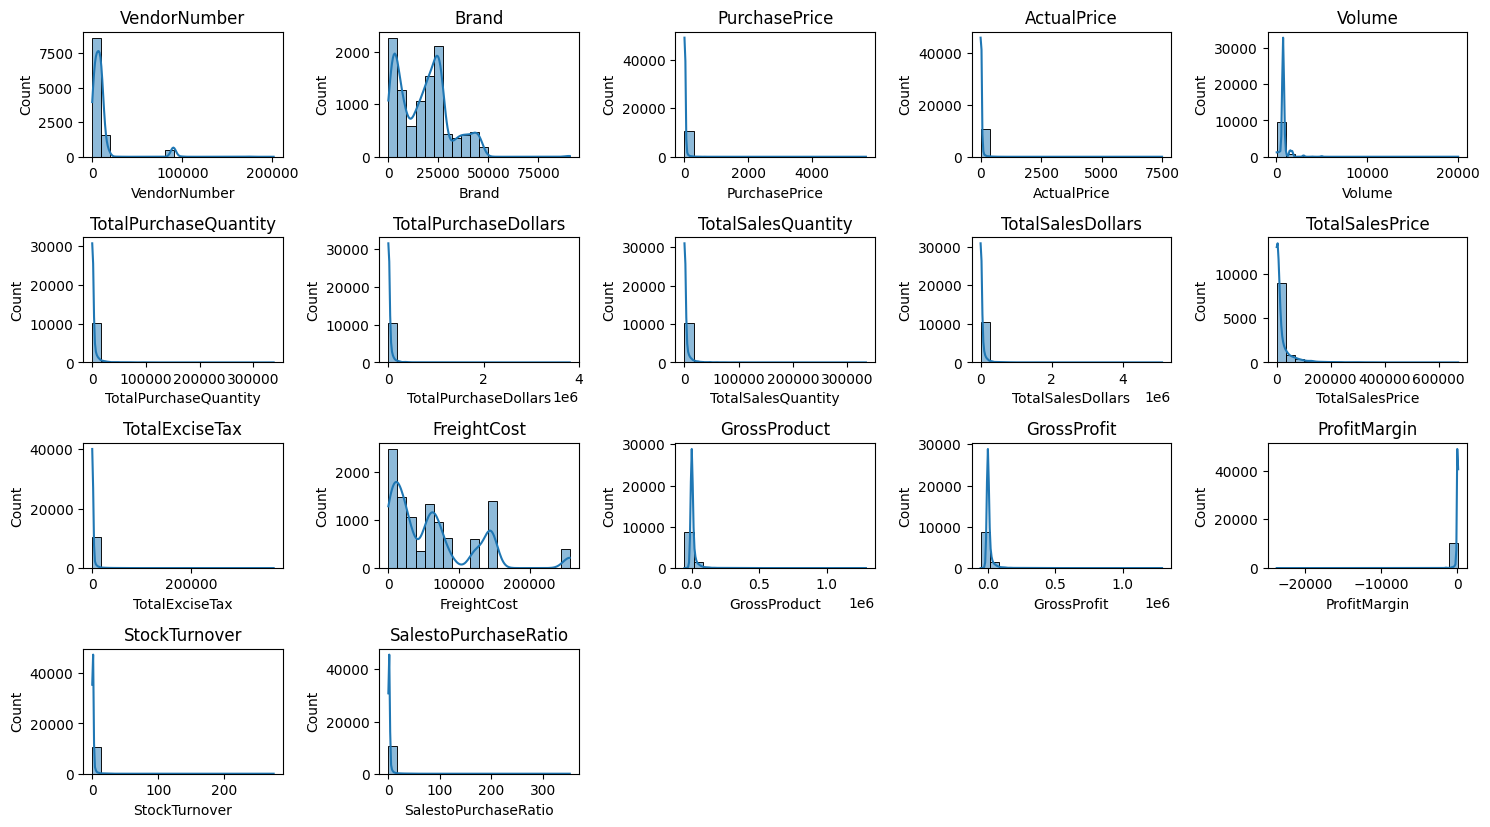

In [94]:
# Distribution Plots for Numerical Columns

numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
  plt.subplot(5, 5, i+1)  # adjust grid layout as needed
  sns.histplot(df[col], kde=True, bins=20)
  plt.title(col)
plt.tight_layout()
plt.show()

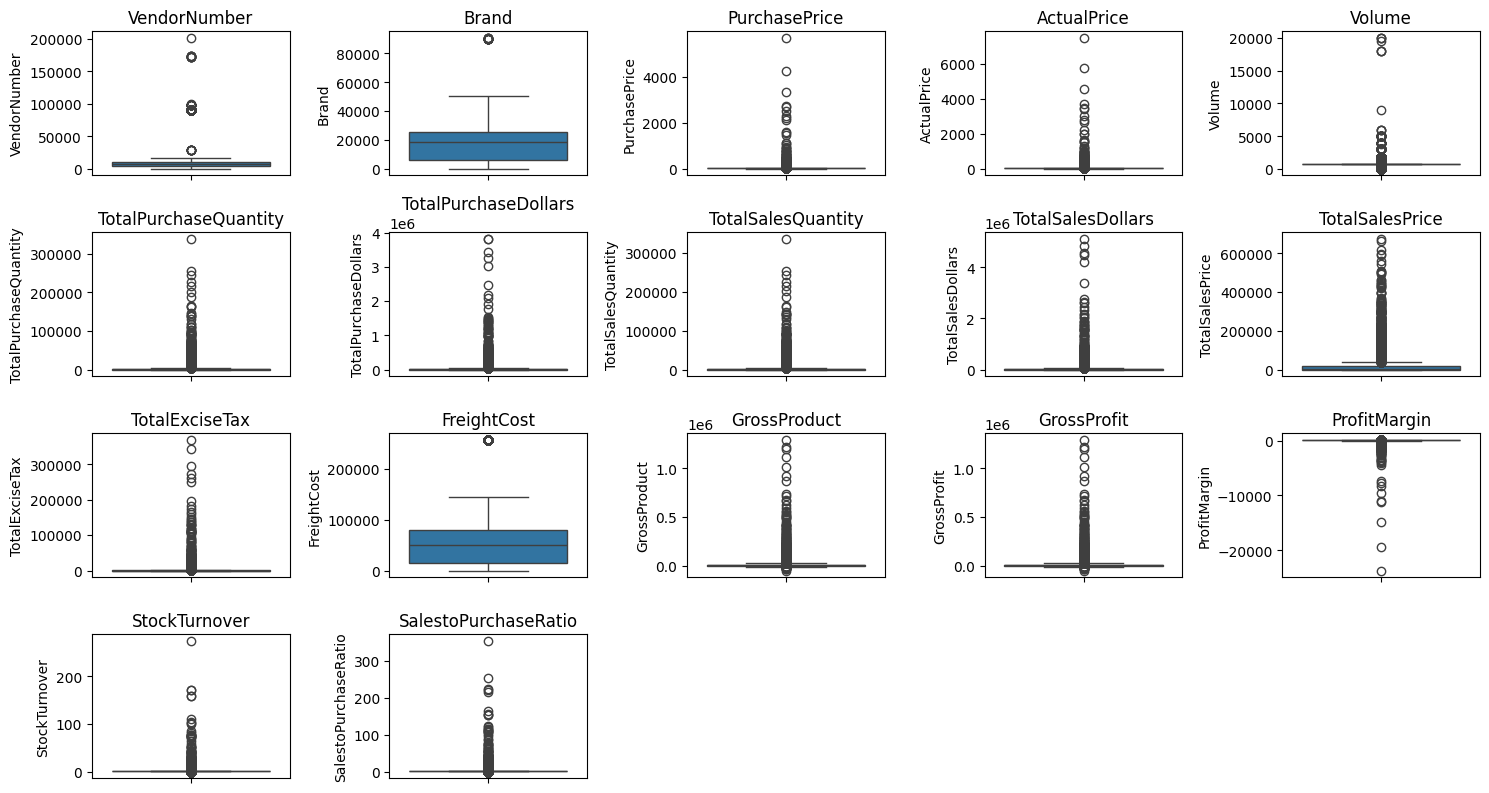

In [96]:
# outlier detction with Boxplots
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
  plt.subplot(5, 5, i+1)
  sns.boxplot(df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

**Summary StatisTics Insights**

Negative & Zero values:

1. Gross Profit: Minimum value is -52002.78, indicating losses. Some products or transaction may be selling at a loss due to high cost or selling at discounts lower than the purchase price.

2. Profit Margin: has a minimum of -Infinite which suggests cases where revenue is zero or even lower than costs.

3. Total Sales Quality & sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.


**Outliers Indicated by High Standard Deviation:**


1. Purchase & Actual Prices: The max values(5, 681.81 & 7499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential  premium products.

2. Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments

3. Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than  1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.



In [97]:
df = pd.read_sql_query("""
Select * from vendor_sales_summary
where GrossProfit > 0 and
ProfitMargin > 0
and TotalSalesQuantity > 0""", con)

In [98]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProduct,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,13.31,83.448276,2.500000,6.041667
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,63.32,96.436186,22.333333,28.059829
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,0.50,25.252525,1.000000,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,141.81,98.974037,72.000000,97.469388


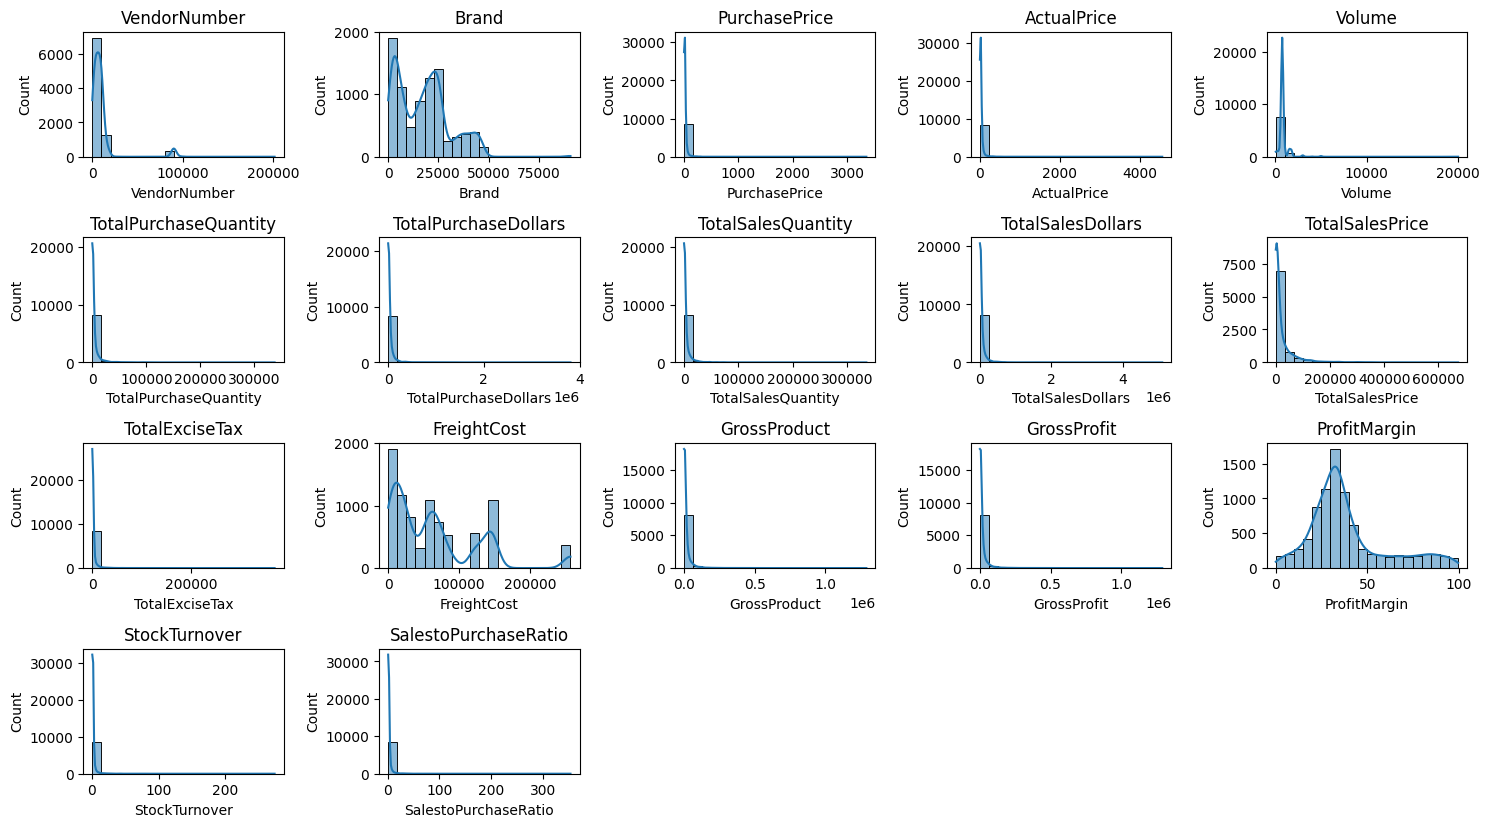

In [99]:
# Distribution Plots for Numerical Columns

numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
  plt.subplot(5, 5, i+1)  # adjust grid layout as needed
  sns.histplot(df[col], kde=True, bins=20)
  plt.title(col)
plt.tight_layout()
plt.show()

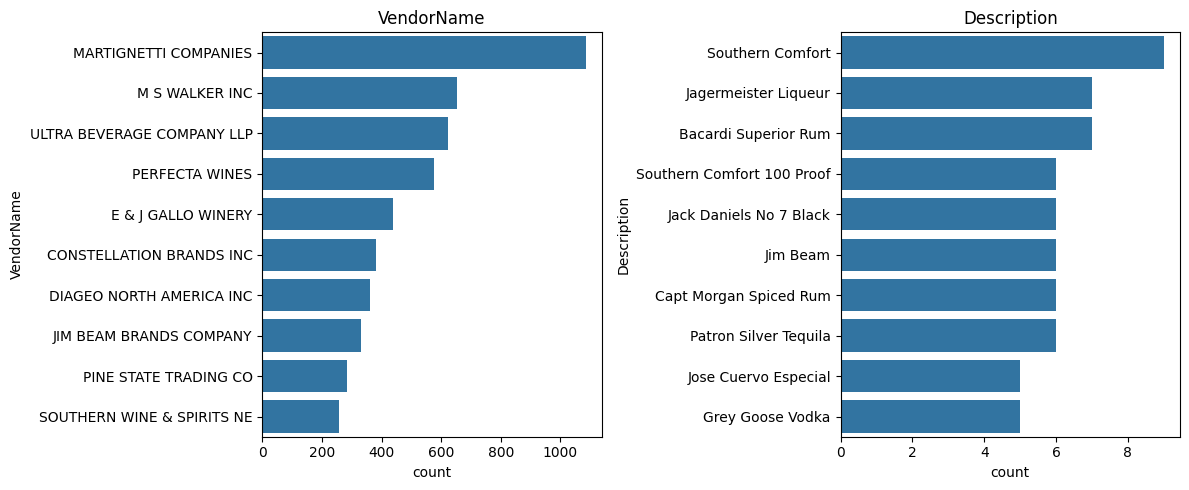

In [101]:
#Count Plots for categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize = (12, 5))
for i, col in enumerate(categorical_cols):
  plt.subplot(1, 2, i+1)
  sns.countplot(y = df[col], order=df[col].value_counts().index[:10])   #top 10 categories
  plt.title(col)
plt.tight_layout()

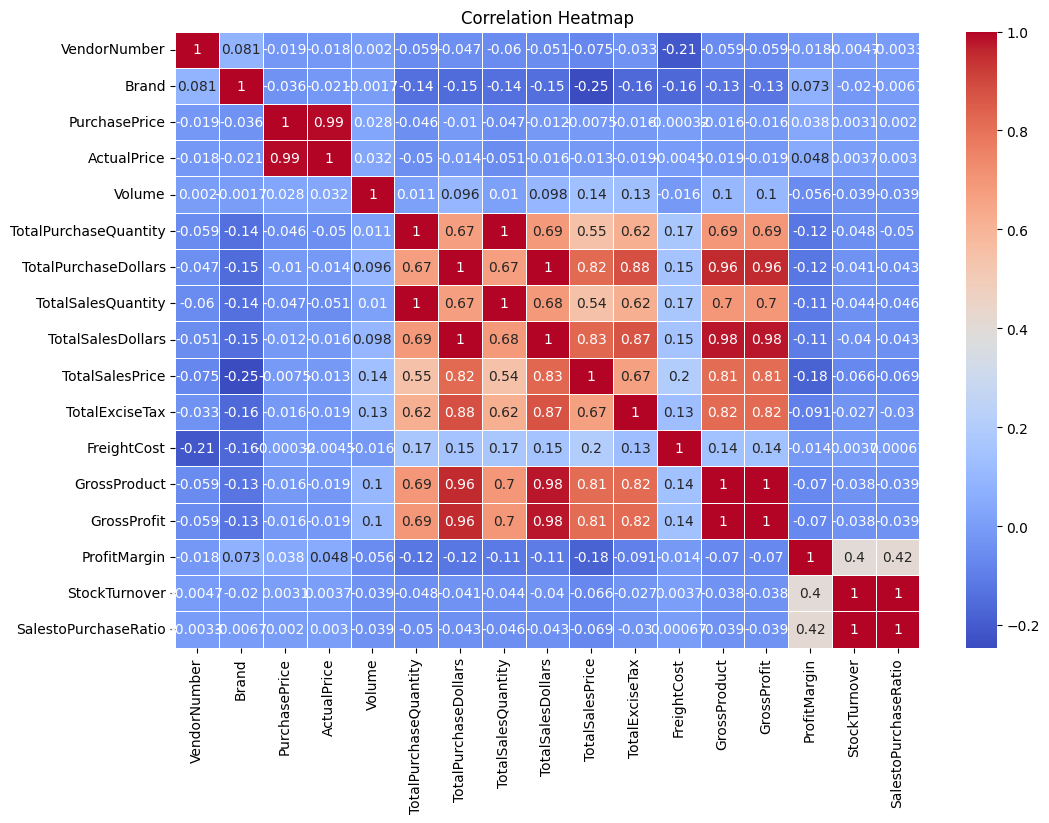

In [103]:
# correlation heatmap

plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap")
plt.show()

**Correlation Insights**

1. PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.

2. Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.

3. Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

4. StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.










**Data Analysis**

Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [104]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [105]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [106]:
low_sales_threshold

np.float64(560.299)

In [107]:
high_margin_threshold


np.float64(64.97017552750111)

In [108]:
# Filter brands with low_sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [111]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]   # for better visualisation

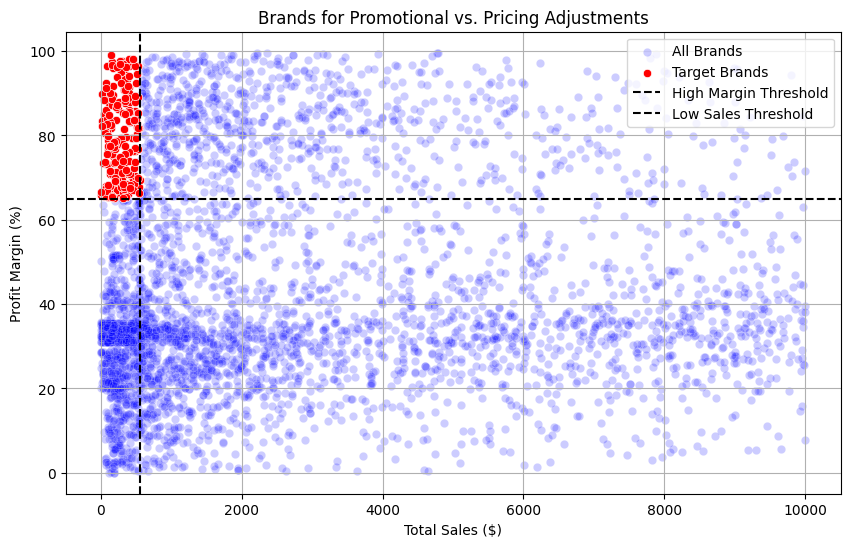

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x = 'TotalSalesDollars', y ='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color="black", label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color="black", label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional vs. Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


**Which vendors and brands demonstrate the highest sales performance?**

In [117]:
def format_dollars(values):
  if values >= 1_000_000:
    return f"{values / 1_000_000:.2f}M"
  elif values >= 1_000:
    return f"{values / 1_000:.2f}K"
  else:
    return str(values)

In [113]:
# top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

,TotalSalesDollars
VendorName,
DIAGEO NORTH AMERICA INC,6.799010e+07
MARTIGNETTI COMPANIES,3.933036e+07
PERNOD RICARD USA,3.206320e+07
JIM BEAM BRANDS COMPANY,3.142302e+07
BACARDI USA INC,2.485482e+07
CONSTELLATION BRANDS INC,2.421875e+07
E & J GALLO WINERY,1.839990e+07
BROWN-FORMAN CORP,1.824723e+07
ULTRA BEVERAGE COMPANY LLP,1.650254e+07


In [115]:
top_brands

,TotalSalesDollars
Description,
Jack Daniels No 7 Black,7964746.76
Tito's Handmade Vodka,7399657.58
Grey Goose Vodka,7209608.06
Capt Morgan Spiced Rum,6356320.62
Absolut 80 Proof,6244752.03
Jameson Irish Whiskey,5715759.69
Ketel One Vodka,5070083.56
Baileys Irish Cream,4150122.07
Kahlua,3604858.66


In [118]:
top_brands.apply(lambda x : format_dollars(x))

,TotalSalesDollars
Description,
Jack Daniels No 7 Black,7.96M
Tito's Handmade Vodka,7.40M
Grey Goose Vodka,7.21M
Capt Morgan Spiced Rum,6.36M
Absolut 80 Proof,6.24M
Jameson Irish Whiskey,5.72M
Ketel One Vodka,5.07M
Baileys Irish Cream,4.15M
Kahlua,3.60M


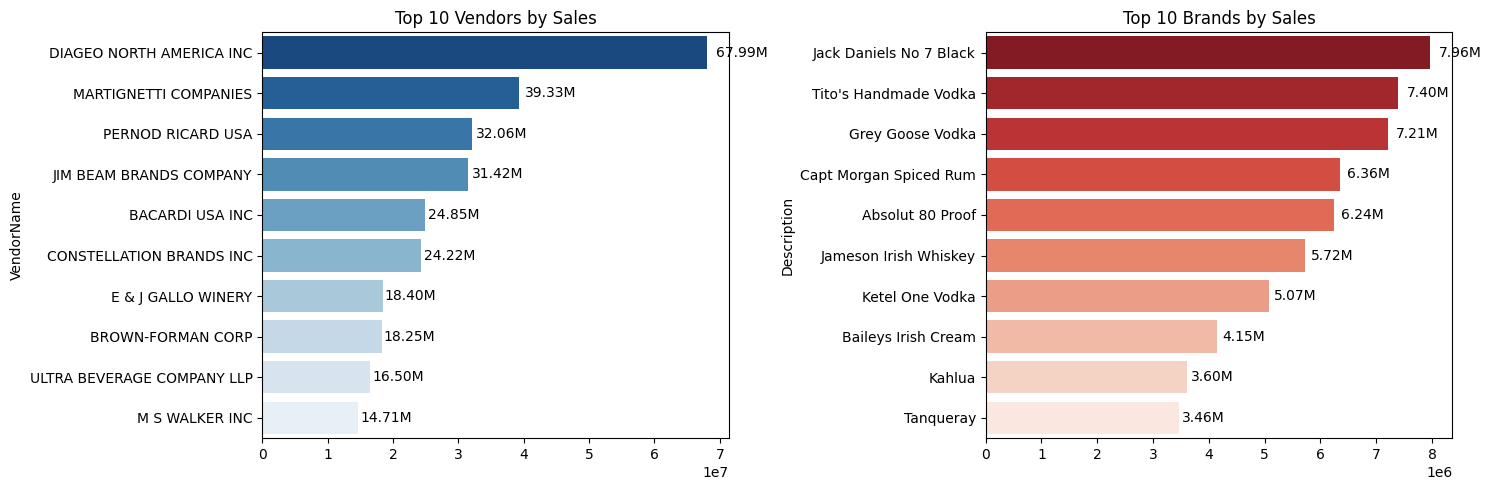

In [128]:
plt.figure(figsize=(15, 5))

# plot for Top Vendors
plt.subplot(1, 2, 1)
ax1=sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")


for bar in ax1.patches:
  ax1.text(
      bar.get_width() + (bar.get_width() * 0.02),
      bar.get_y() + bar.get_height()/2,
      format_dollars(bar.get_width()),
      ha='left', va='center', fontsize=10, color='black')


# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2=sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")


for bar in ax2.patches:
  ax2.text(
      bar.get_width() + (bar.get_width() * 0.02),
      bar.get_y() + bar.get_height()/2,
      format_dollars(bar.get_width()),
      ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


**Which vendors contribute the most to total purchase dollars?**

In [146]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()
vendor_performance.shape

(119, 4)

In [159]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()* 100

In [160]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending = False), 2)

In [161]:
# Display top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [162]:
top_vendors['PurchaseContribution%'].sum()

np.float64(65.69000000000001)

In [163]:
top_vendors['Cummulative_Contributions%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cummulative_Contributions%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


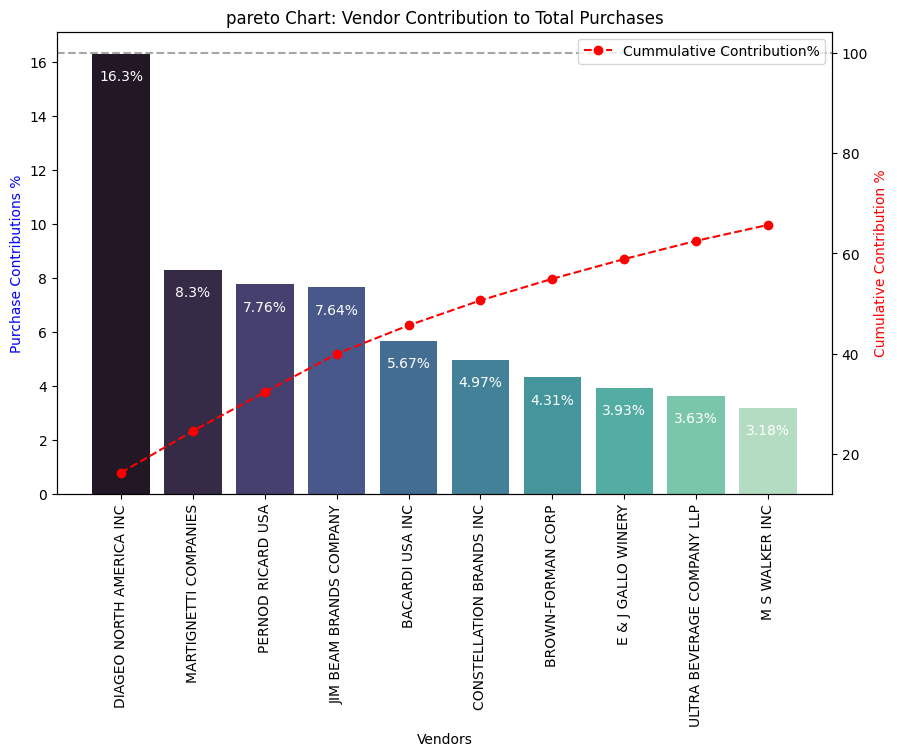

In [167]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x = top_vendors['VendorName'], y = top_vendors['PurchaseContribution%'], palette="mako", ax = ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
  ax1.text(i, value-1, str(value) + '%', ha='center', fontsize=10, color='white')

#Line Plot for Cummulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cummulative_Contributions%'], color='red', marker='o', linestyle='dashed', label='Cummulative Contribution%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contributions %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color = 'red')
ax1.set_xlabel('Vendors')
ax1.set_title('pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y = 100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')
plt.show()

**How much of Total procurement is dependent on the top vendors?**


In [168]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 65.69 %


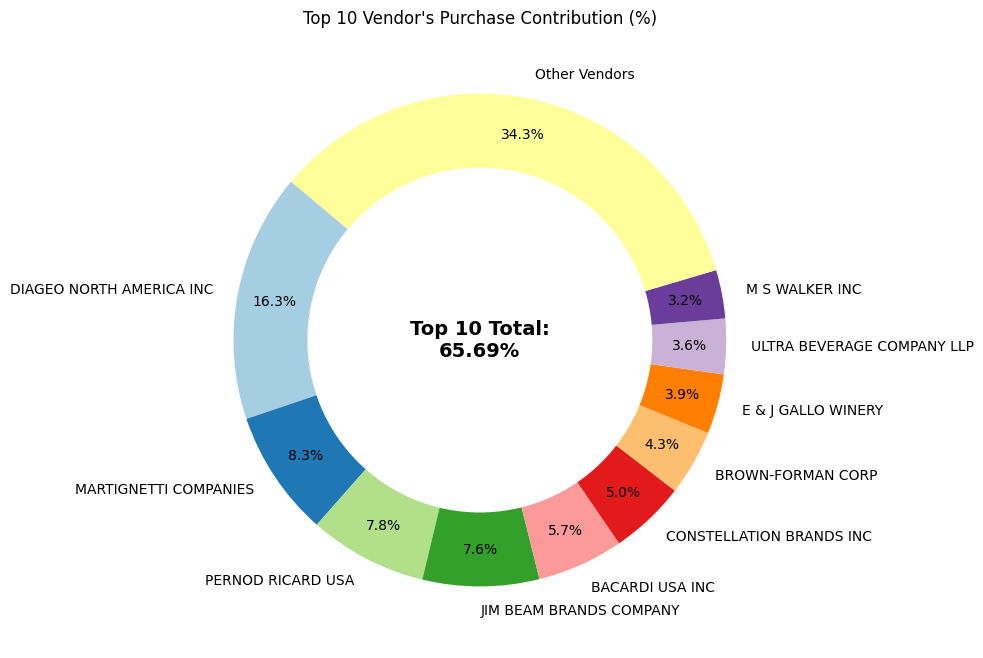

In [171]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# append "Other Vendors" category

vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# add Total Contribution annotation in the center
plt.text(0,0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')


plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()


**Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?**

In [173]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [175]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "large"])

In [177]:
df[['OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,large,145080
1,large,164038
2,large,187407
3,large,201682
4,large,138109
...,...,...
8560,Small,2
8561,Small,6
8562,Small,2
8563,Small,1


In [178]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.057543
Medium,15.486414
large,10.777625


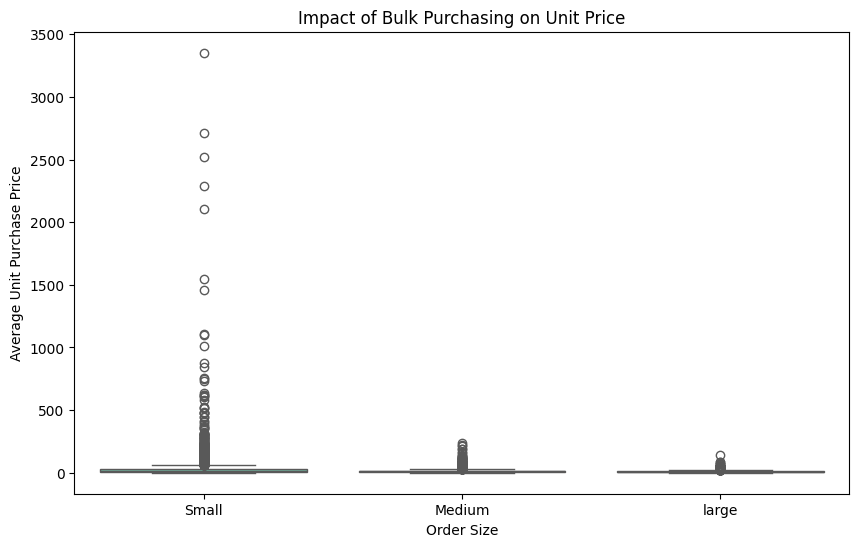

In [179]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

1. Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.

2. The price difference between Small and Large orders is substantial (~72% reduction in unit cost)

3. This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

**Which vendors have low inventory turnover, indicating excess stock and slow-moving products?**


In [182]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


**How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?**

In [183]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 2.71M


In [184]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()


# Sort vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


**What is the 95% confidence intervals for the profit margins of top-performing and low-performing vendors.**


In [185]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)


In [190]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [191]:
top_vendors

,ProfitMargin
0,25.297693
1,21.062810
2,24.675786
3,27.139908
4,28.412764
...,...
3523,79.684817
3681,85.782102
4751,93.085860
4920,95.012530


In [196]:
def confidence_interval(data, confidence=0.95):
  mean_val = np.mean(data)
  std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Standard error
  t_critical = stats.t.ppf((1+confidence) / 2, df = len(data) -1)
  margin_of_error= t_critical * std_err
  return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.17
Low Vendors 95% CI: (40.48, 42.62), Mean: 41.55


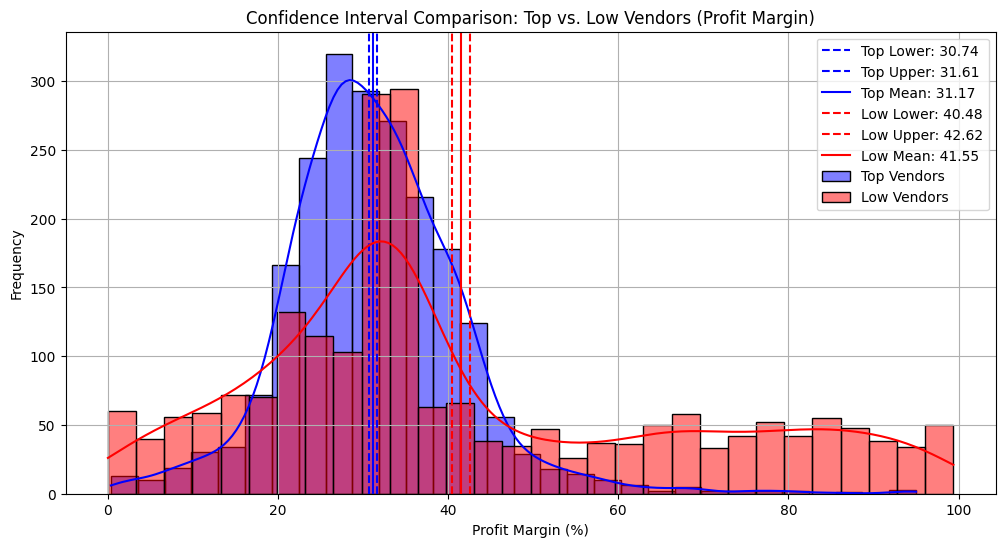

In [197]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


1. The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).

2. This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.

3. For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.

4. For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

 **Is there a significant difference in profit margins between top-performing and low-performing vendors?**

**Hypothesis:**

**H₀ (Null Hypothesis):** There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

**H₁ (Alternative Hypothesis):** The mean profit margins of top-performing and low-performing vendors are significantly different.

In [198]:

top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")



T-Statistic: -17.6440, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.


In [200]:
# 1. Save the final DataFrame to a CSV file
final_df = vendor_sales_summary
final_df.to_csv('vendor_sales_summary.csv', index=False)

# 2. Download the CSV file to your local machine
from google.colab import files
files.download('vendor_sales_summary.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [201]:
final_df2 = brand_performance
final_df2.to_csv('brand_performance.csv', index=False)

# 2. Download the CSV file to your local machine
from google.colab import files
files.download('brand_performance.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [203]:
final_df3 = vendor_performance
final_df3.to_csv('vendor_performance.csv', index=False)

# 2. Download the CSV file to your local machine
from google.colab import files
files.download('vendor_performance.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [204]:
final_df4 = df
final_df4.to_csv('df.csv', index=False)

# 2. Download the CSV file to your local machine
from google.colab import files
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>